### Reading data

In [21]:
# importing data
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\bharo\Downloads\archive\amazon_alexa.tsv",sep="\t")
df.rename(columns = {"verified_reviews":"review"},inplace=True)
df.head()

,rating,date,variation,review,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Data Cleaning


In [22]:
# converting into lower case
df["review"] = df["review"].map(str.lower)
df.head()


,rating,date,variation,review,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo!,1
1,5,31-Jul-18,Charcoal Fabric,loved it!,1
2,4,31-Jul-18,Walnut Finish,"sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing. my 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [23]:
# removing special characters
df["review"] = df['review'].str.replace("[^\w\s]"," ")
df.head()

C:\Users\bharo\AppData\Local\Temp\ipykernel_12764\3878977829.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review"] = df['review'].str.replace("[^\w\s]"," ")


,rating,date,variation,review,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [24]:
#Dropping stop words using nltk package
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = stopwords.words("english")
df["review"] = df["review"].apply(lambda x: " ".join([word for word in str(x).split() if word not in stop_word]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bharo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,date,variation,review,feedback
0,5,31-Jul-18,Charcoal Fabric,love echo,1
1,5,31-Jul-18,Charcoal Fabric,loved,1
2,4,31-Jul-18,Walnut Finish,sometimes playing game answer question correct...,1
3,5,31-Jul-18,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


### checking positive and negative counts on feedback to see the distribution.

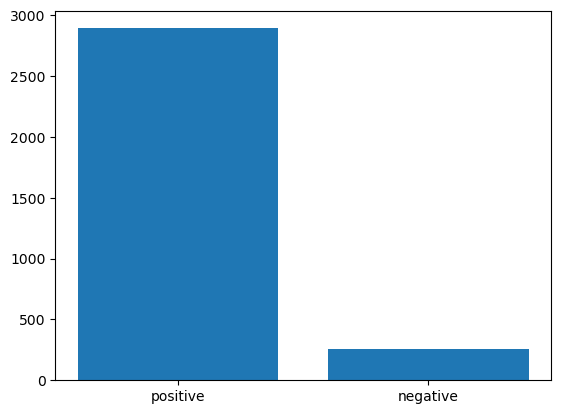

In [25]:
import matplotlib.pyplot as plt
classes = df.feedback.unique()
counts = []
for i in classes:
    count = len(df[df.feedback == i])
    counts.append(count)
plt.bar(['positive', 'negative'], counts)  
plt.show()

### Splitting the dataset into training and testing dataset.

In [26]:
! pip install scikit-learn
from sklearn.model_selection import train_test_split
x = df['review'].values
y = df['feedback'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1000)

### Vectorizing the text

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test = vectorizer.transform(x_test)


### LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### Predicting new data

In [30]:
new_reviews = [ 'Very good effort, but not five stars', 'Clear and concise']
X_new = vectorizer.transform(new_reviews)
classifier.predict(X_new)
## since mojority of data were positive review, the training model is not very good to predict negative review.

array([1, 1], dtype=int64)

### Evaluating model performance

At the end of Chapter 5, the author uses a custom-built class to summarize model performance. This class doesn’t actually exist (from the author) but you can make it a reality. Using the object you have from mnb_predictions, create something similar to the output on page 335. Feel free (but not obligated) to venture further into the label names and numbers (page 336) and confusion matrix (page 337).

In [31]:
! pip install model_evaluation_utils 

ERROR: Could not find a version that satisfies the requirement model_evaluation_utils (from versions: none)
ERROR: No matching distribution found for model_evaluation_utils


In [45]:
# reference from https://github.com/bellevue-university/dsc360/blob/main/12%20Week/week_6/week_6.ipynb
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
print('Confusion matrix: \n', confusion_matrix)

from sklearn.metrics import accuracy_score # standard
print('Accuracy:', round(accuracy_score(y_test, y_pred), 5))

# precision
from sklearn.metrics import precision_score
print('Precision:', round(precision_score(y_test, y_pred), 5))

# recall
from sklearn.metrics import recall_score
print('Recall:', round(recall_score(y_test, y_pred), 5))

from sklearn.metrics import f1_score
print('F1-Score:', round(f1_score(y_test, y_pred), 5))

Confusion matrix: 
 [[ 20  37]
 [  4 569]]
Accuracy: 0.93492
Precision: 0.93894
Recall: 0.99302
F1-Score: 0.96522
